In [20]:
# Panutad Sirikul
# 650510714


###1. Load the Breast Cancer Wisconsin Data Set (source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) library Investigate the dataset details) from scikit-learn

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [22]:
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

### 2. Investigate the dataset details

In [23]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
# สำรวจขนาดของ Data set
print("Rows:", data.shape[0], "Columns:", data.shape[1])

Rows: 569 Columns: 31


In [25]:
# แสดงรายชื่อคอลัมน์ทั้งหมด
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

### 3. Construct new features (one or more) by combining some features using a decision tree.  

In [26]:
param_grid = {'max_depth': [3, 4, None]}
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring = 'neg_mean_squared_error', param_grid = param_grid)
tree_model.fit(data[['mean radius', 'mean texture', 'mean smoothness']], data['mean perimeter'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, None]},
             scoring='neg_mean_squared_error')

In [27]:
data['new feature'] = tree_model.predict(data[['mean radius', 'mean texture', 'mean smoothness']])

In [28]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,new feature
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,122.80
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,132.90
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,130.00
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,77.58
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,135.10


Text(0.5, 1.0, 'Tree derived feature vs breast cancer')

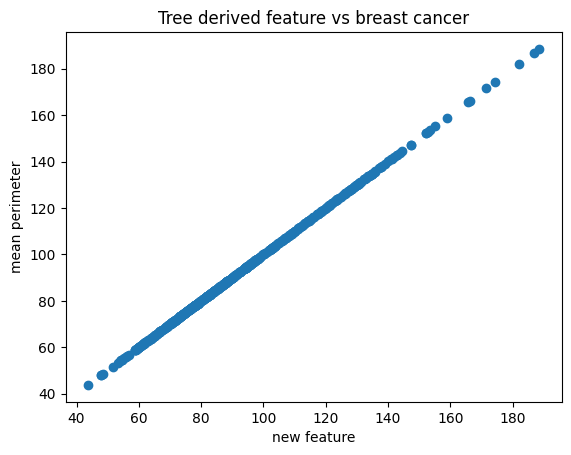

In [29]:
# ลอง Plot กับ Feature ที่สร้างขึ้นมาใหม่กับตัวแปรตาม mean perimeter
plt.scatter(data['new feature'], data["mean perimeter"])
plt.xlabel('new feature')
plt.ylabel('mean perimeter')
plt.title('Tree derived feature vs breast cancer')

### 4. Expand some features (more than 2) using polynomial expansion with a degree 2.

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
poly.fit(data[['mean radius', 'mean texture', 'mean smoothness']])

PolynomialFeatures(include_bias=False)

In [31]:
# ตรวจสอบว่ามีการเพิ่มขึ้นของคอลัมน์
poly.get_feature_names_out(['mean radius', 'mean texture', 'mean smoothness'])

array(['mean radius', 'mean texture', 'mean smoothness', 'mean radius^2',
       'mean radius mean texture', 'mean radius mean smoothness',
       'mean texture^2', 'mean texture mean smoothness',
       'mean smoothness^2'], dtype=object)

In [32]:
data_t = poly.transform(data[['mean radius', 'mean texture', 'mean smoothness']])

In [33]:
data_t

array([[1.7990000e+01, 1.0380000e+01, 1.1840000e-01, ..., 1.0774440e+02,
        1.2289920e+00, 1.4018560e-02],
       [2.0570000e+01, 1.7770000e+01, 8.4740000e-02, ..., 3.1577290e+02,
        1.5058298e+00, 7.1808676e-03],
       [1.9690000e+01, 2.1250000e+01, 1.0960000e-01, ..., 4.5156250e+02,
        2.3290000e+00, 1.2012160e-02],
       ...,
       [1.6600000e+01, 2.8080000e+01, 8.4550000e-02, ..., 7.8848640e+02,
        2.3741640e+00, 7.1487025e-03],
       [2.0600000e+01, 2.9330000e+01, 1.1780000e-01, ..., 8.6024890e+02,
        3.4550740e+00, 1.3876840e-02],
       [7.7600000e+00, 2.4540000e+01, 5.2630000e-02, ..., 6.0221160e+02,
        1.2915402e+00, 2.7699169e-03]])

In [34]:
# แปลงเป็น DataFrame
data_t = pd.DataFrame(data_t)
data_t.columns = poly.get_feature_names_out(['mean radius', 'mean texture', 'mean smoothness'])

In [35]:
data_t.head()

,mean radius,mean texture,mean smoothness,mean radius^2,mean radius mean texture,mean radius mean smoothness,mean texture^2,mean texture mean smoothness,mean smoothness^2
0,17.99,10.38,0.11840,323.6401,186.7362,2.130016,107.7444,1.228992,0.014019
1,20.57,17.77,0.08474,423.1249,365.5289,1.743102,315.7729,1.505830,0.007181
2,19.69,21.25,0.10960,387.6961,418.4125,2.158024,451.5625,2.329000,0.012012
3,11.42,20.38,0.14250,130.4164,232.7396,1.627350,415.3444,2.904150,0.020306
4,20.29,14.34,0.10030,411.6841,290.9586,2.035087,205.6356,1.438302,0.010060


In [36]:
# โค้ดสำหรับการ Plot ดูความสัมพันธ์ตัวแปรต้นกับตัวแปรตาม
def plot_features(df, target):
    nb_rows = 5
    nb_cols = 4
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)
    n = 0
    for i in range(0, nb_rows):
      for j in range(0, nb_cols):
        if n!=19:
          axs[i, j].scatter(df[df.columns[n]], target)
          axs[i, j].set_title(df.columns[n])
          n += 1
    plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

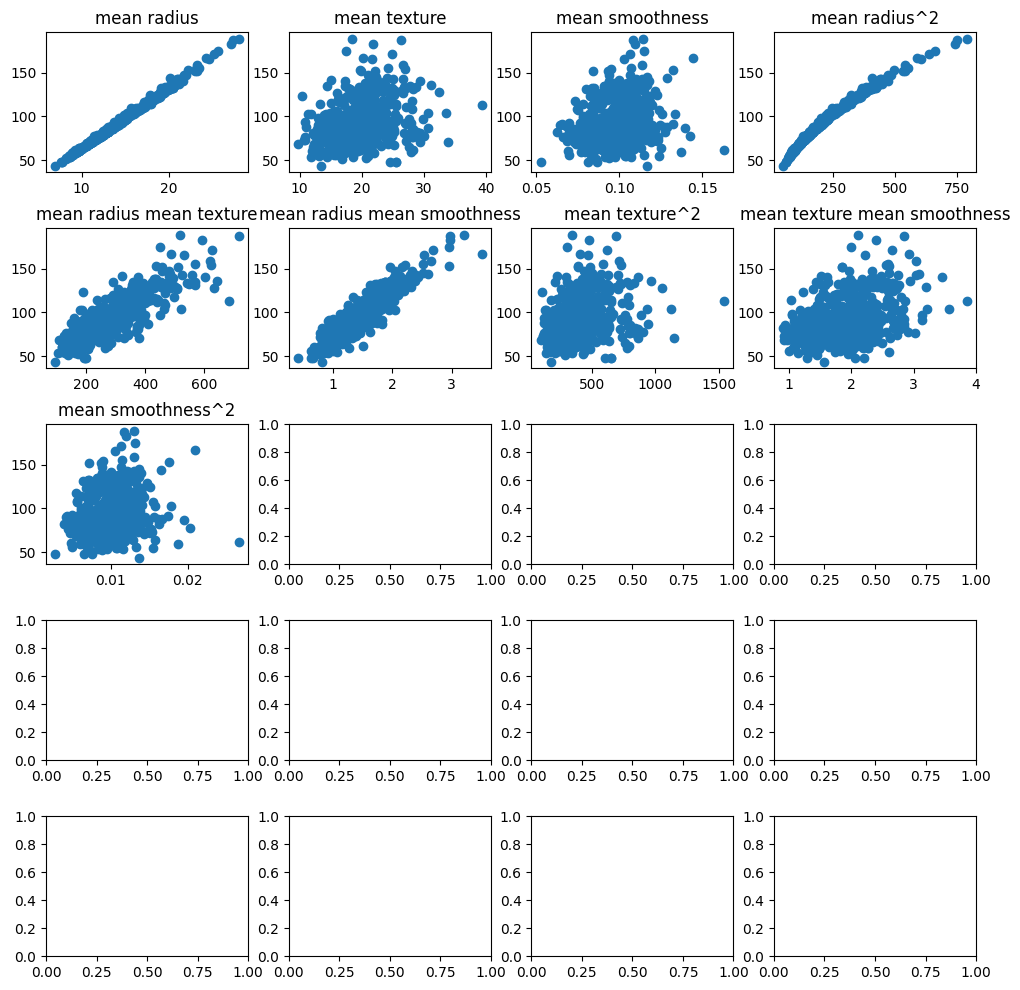

In [37]:
plot_features(data_t, data['mean perimeter'])

### 5. Submit your program to the assignment submission system (http://hw.cs.science.cmu.ac.th/).